In [ ]:
# Imports, Instalations and Constants
!pip install transformers

import pandas as pd
import tensorflow as tf
import transformers
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification

pd.set_option('display.max_colwidth', None)
MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english'# This model is a fine-tune checkpoint of DistilBERT-base-uncased, fine-tuned on SST-2.
BATCH_SIZE = 16
N_EPOCHS = 3 # we can put more, because evaluation of the model shows big difference in loss with accuracy 1.0

     |████████████████████████████████| 4.0 MB 4.7 MB/s 
     |████████████████████████████████| 77 kB 7.0 MB/s 
     |████████████████████████████████| 596 kB 44.3 MB/s 
     |████████████████████████████████| 895 kB 42.3 MB/s 
     |████████████████████████████████| 6.6 MB 25.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# dowload dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/twitter/newdatasetwithcoviddata.csv')



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data['text'], data['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.4, 
                                                                    stratify=data['label'])

In [ ]:
data.shape

(161743, 2)

In [ ]:
pd.DataFrame(X_train)[:3]

text
160032                                                                                       he has my vote electionday
126256  when our old colony y branches are able to re open we want to thank all first responders police fire emt and h…
716                                                     ioc joins forces with who and the united nations to fight covid

In [ ]:
#check the shapes and split proportion
X_train.shape, X_test.shape, y_train.shape

((97045,), (64698,), (97045,))

In [ ]:
print('The proportion in y_train\n',y_train.value_counts(normalize=True).mul(100))
print('The proportion in y_test\n',y_test.value_counts(normalize=True).mul(100))

The proportion in y_train
 1    82.144366
0    17.855634
Name: label, dtype: float64
The proportion in y_test
 1    82.144734
0    17.855266
Name: label, dtype: float64


In [ ]:
print(X_train)

160032                                                                                              he has my vote electionday
126256         when our old colony y branches are able to re open we want to thank all first responders police fire emt and h…
716                                                            ioc joins forces with who and the united nations to fight covid
64926     indiafightscorona \n\n🔴low risk isn t no risk\n\n☑️even if you are less than years old and do not have an underlyin…
57411                          cheap weed is bad for your health people hope you can see the effects smoke something expensive
                                                                  ...                                                         
110219              profits from all 🇨🇦resources projects go toward education including preserving all first nation languages…
16720            ‘australian agribusiness bucking trends as economic predictions grow gloomier amid covid pande

In [ ]:
print(X_test)

62338                                                                                 kids react to our new orange president
151970    what is with people thinking herd immunity is a good or viable option the last time i checked herd immunity would…
141303                                                                  fire truck feud ends with department dissolved local
98701                                                            yes ‘quarantine fatigue’ is real\n\nhere’s how to cope\n gt
67261       cdc and epa release guidance for cleaning and disinfecting public spaces workplaces businesses schools and homes
                                                                 ...                                                        
141810                                      information about what to do if you are sick can be found on cdc s website covid
93502                                                                                                            michigan s…


In [ ]:
#Max sentence length
MAX_LEN = X_train.apply(lambda s: len([x for x in s.split()])).max()
MAX_LEN

97

In [ ]:
X_test.isnull().values.any()
X_test.isnull().sum().sum()

0

In [ ]:
df=X_test.dropna()

In [ ]:
df.isnull().values.any()
df.isnull().sum().sum()

0

In [ ]:
#Encode with DistilBertTokenizer

#define a tokenizer object
tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME)

#tokenize the text (padding to max sequence in batch)
train_encodings = tokenizer(list(X_train.values), truncation=True, padding=True)
test_encodings = tokenizer(list(df.values), truncation=True, padding=True)

#print the first paragraph and it transformation
print(f'First text: \'{X_train[:1]}\'')
print(f'Input ids: {train_encodings["input_ids"][0]}')
print(f'Attention mask: {train_encodings["attention_mask"][0]}')


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

First text: '160032    he has my vote electionday
Name: text, dtype: object'
Input ids: [101, 2002, 2038, 2026, 3789, 2602, 10259, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


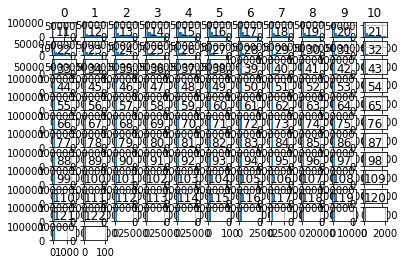

In [ ]:
#Length check
pd.DataFrame(train_encodings["input_ids"]).hist();

In [ ]:
#title Default title text
len(train_encodings["attention_mask"][0]) #max len tokenized senten

123

In [ ]:
train_encodings

In [ ]:
y_test1 = y_test[:64698]

In [ ]:
#Turn the labels and encodings into a tf.Dataset object
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),
                                                    list(y_train.values)))

test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings),
                                                    list(y_test1.values)))

In [ ]:
train_dataset 

<TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(123,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(123,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
#Fine-tuning with native TensorFlow
model = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME)

optimizerr = tf.keras.optimizers.Adam(learning_rate=5e-5)
losss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # Computes the crossentropy loss between the labels and predictions. 
model.compile(optimizer=optimizerr,                                     
              loss=losss,
              metrics=['accuracy'])

model.fit(train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE), 
          epochs=N_EPOCHS,
          batch_size=BATCH_SIZE)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Epoch 1/3
6066/6066 [==============================] - 2571s 421ms/step - loss: 0.1220 - accuracy: 0.9529
Epoch 2/3
6066/6066 [==============================] - 2557s 422ms/step - loss: 0.0666 - accuracy: 0.9748
Epoch 3/3
6066/6066 [==============================] - 2556s 421ms/step - loss: 0.0423 - accuracy: 0.9845


In [ ]:
test_dataset

<TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(167,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(167,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
#Model Evaluation
model.evaluate(test_dataset.shuffle(len(X_test)).batch(BATCH_SIZE), return_dict=True, batch_size=BATCH_SIZE)

4044/4044 [==============================] - 790s 195ms/step - loss: 0.0989 - accuracy: 0.9674


{'accuracy': 0.9674023985862732, 'loss': 0.09888310730457306}

In [ ]:
#Predict on the different text examples
def predict_proba(text_list, model, tokenizer):   
  encodings = tokenizer(text_list, max_length=MAX_LEN, truncation=True, padding=True)
  dataset = tf.data.Dataset.from_tensor_slices((dict(encodings))) 
  preds = model.predict(dataset.batch(1)).logits
  res = tf.nn.softmax(preds, axis=1).numpy()
    
  return res

In [ ]:
string =['police uber driver held in shooting deaths of in michigan']
predict_proba(string, model, tokenizer)

array([[0.9986351 , 0.00136483]], dtype=float32)